In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df1=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df1.isna().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month_apr              0
month_aug              0
month_dec              0


In [6]:
df1['default']=np.where(df1['default'].str.contains("yes"),1,0)
df1['housing']=np.where(df1['housing'].str.contains("yes"),1,0)
df1['loan']=np.where(df1['loan'].str.contains("yes"),1,0)
df1['y']=np.where(df1['y'].str.contains("yes"),1,0)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Dividing data set for train test split 

x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)
y=df1.iloc[:,10]


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75)

In [11]:
ytest

11314    0
20912    0
37465    0
20419    0
27497    0
        ..
5919     0
35178    0
19308    0
34533    0
33098    0
Name: y, Length: 11303, dtype: int32

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
#Logistic regression and fit the model
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#xtest data predicted with ytest data

ypred=lg.predict(xtest)

In [15]:
print('actual y:',ytest[:20].values)
print('predicited y:',ypred[:20])

actual y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predicited y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9976
           1       0.61      0.21      0.31      1327

    accuracy                           0.89     11303
   macro avg       0.76      0.59      0.62     11303
weighted avg       0.87      0.89      0.87     11303



In [18]:
#check confusion matrix

confusion_matrix(ytest,ypred)

array([[9801,  175],
       [1053,  274]], dtype=int64)

<AxesSubplot:>

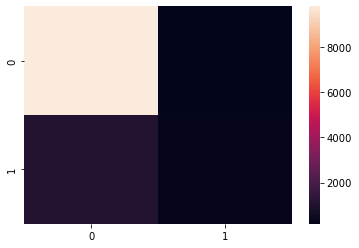

In [19]:
sns.heatmap(confusion_matrix(ytest,ypred))

In [20]:
prob=lg.predict_proba(xtest)[:,1]


ROC Curve

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,accuracy_score

auc accuracy:  0.8591079782132732


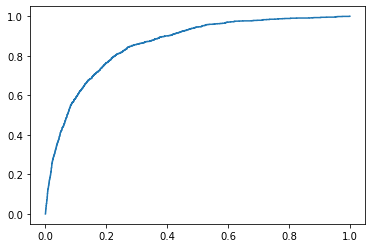

In [22]:
auc=roc_auc_score(ytest,prob)
fpr,tpr,threshold=roc_curve(ytest,prob)
plt.plot(fpr,tpr)
print('auc accuracy: ',auc)

In [23]:
#checking threshols value and recall value
fpr,tpr,threshold=roc_curve(ytest,prob)
threshold

array([1.99992266e+00, 9.99922658e-01, 9.99615593e-01, ...,
       5.87429374e-07, 4.88122969e-07, 2.28959019e-14])

In [24]:
accuracy=[]
for i in threshold:
    ypred=np.where(prob>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [25]:
final_threshold=pd.concat([pd.Series(threshold),pd.Series(accuracy)],axis=1)
final_threshold.columns=['Threshold','Accuracy']

In [26]:
final_threshold.sort_values(by='Accuracy',ascending=False)

,Threshold,Accuracy
263,4.588158e-01,0.893745
264,4.586519e-01,0.893745
265,4.583743e-01,0.893745
283,4.409387e-01,0.893745
285,4.397364e-01,0.893657
...,...,...
1755,1.030451e-03,0.139167
1756,1.006179e-03,0.139078
1757,5.874294e-07,0.118199
1758,4.881230e-07,0.118110


In [27]:
from sklearn.preprocessing import binarize

In [28]:
y=binarize([prob],threshold=4.040670e-01)[0]

In [29]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9976
           1       0.58      0.30      0.39      1327

    accuracy                           0.89     11303
   macro avg       0.75      0.63      0.67     11303
weighted avg       0.87      0.89      0.88     11303

